In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import matplotlib.colors as mcolors


def kmeans(X, k, max_iters=100):
    n = X.shape[0]
    centers = X[np.random.choice(n, k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centers == new_centers):
            break
        
        centers = new_centers
    
    return labels, centers

def generate_colors(k):
    cmap = plt.cm.get_cmap('tab10')  # Choose a colormap
    colors = [mcolors.rgb2hex(cmap(i)) for i in range(k)]
    return colors


In [107]:
import pandas as pd
import numpy as np 
import matplotlib.colors as mcolors

def k_means(data):

    data = pd.read_csv(data)
    data = data.values
    k_values = range(2, 15)

    sse_values = []

    for k in k_values:
        labels, centers = kmeans(data, k)
        distances = np.linalg.norm(data - centers[labels], axis=1)
        sse = np.sum(distances ** 2)
        sse_values.append(sse)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(k_values, sse_values, marker='o')
    plt.title('SSE vs. Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)');
    plt.show()

    k = np.argmin(sse_values) 
    labels, centers = kmeans(data, k)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = generate_colors(k)
    for i in range(k):
        cluster_points = data[labels == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=colors[i], label=f'Cluster {i+1}')

    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], color='k', marker='x', label='Cluster Centers')

    ax.set_title(f'K-means Clustering (k={k})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()


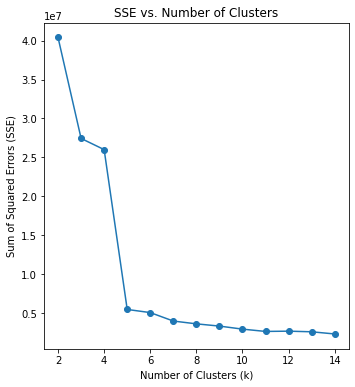

/var/folders/xd/w_zb7xsn3cn2yyq8d2db1vl40000gn/T/ipykernel_75448/2413225252.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # Choose a colormap


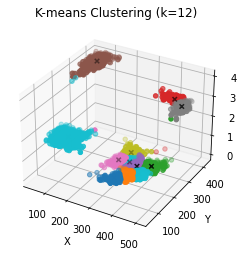

In [108]:

k_means("/Users/pouriya/Downloads/HW5_files/1.csv")

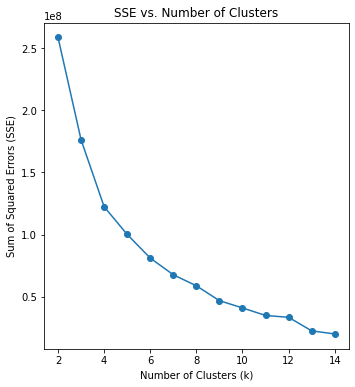

/var/folders/xd/w_zb7xsn3cn2yyq8d2db1vl40000gn/T/ipykernel_75448/2413225252.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # Choose a colormap


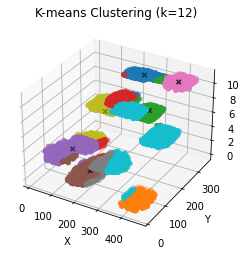

In [109]:

k_means("2.csv")

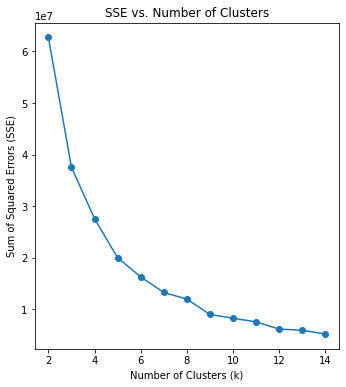

/var/folders/xd/w_zb7xsn3cn2yyq8d2db1vl40000gn/T/ipykernel_75448/2413225252.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # Choose a colormap


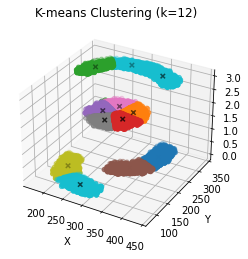

In [110]:

k_means("3.csv")

In [103]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def dbscan(data):
    first_dataset = pd.read_csv(data)
    first_model = first_dataset.loc[:,['x','y','color']].values
    dbscan = DBSCAN(eps = 8, min_samples = 4).fit(first_model)
    labels = dbscan.labels_

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(first_model[:, 0], first_model[:, 1], np.zeros_like(first_model[:, 0]), c=labels, cmap='plasma')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print("Number of clusters:", num_clusters)


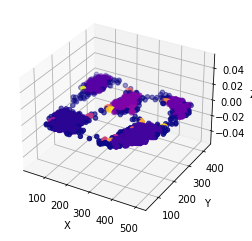

Number of clusters: 20


In [104]:
dbscan("1.csv")

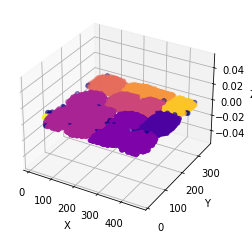

Number of clusters: 8


In [105]:
dbscan("/2.csv")

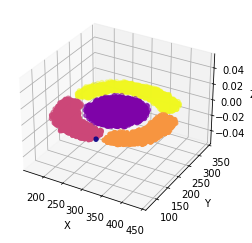

Number of clusters: 4


In [106]:
dbscan("/3.csv")